In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [6]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

# Exploratory Data Analysis (EDA)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

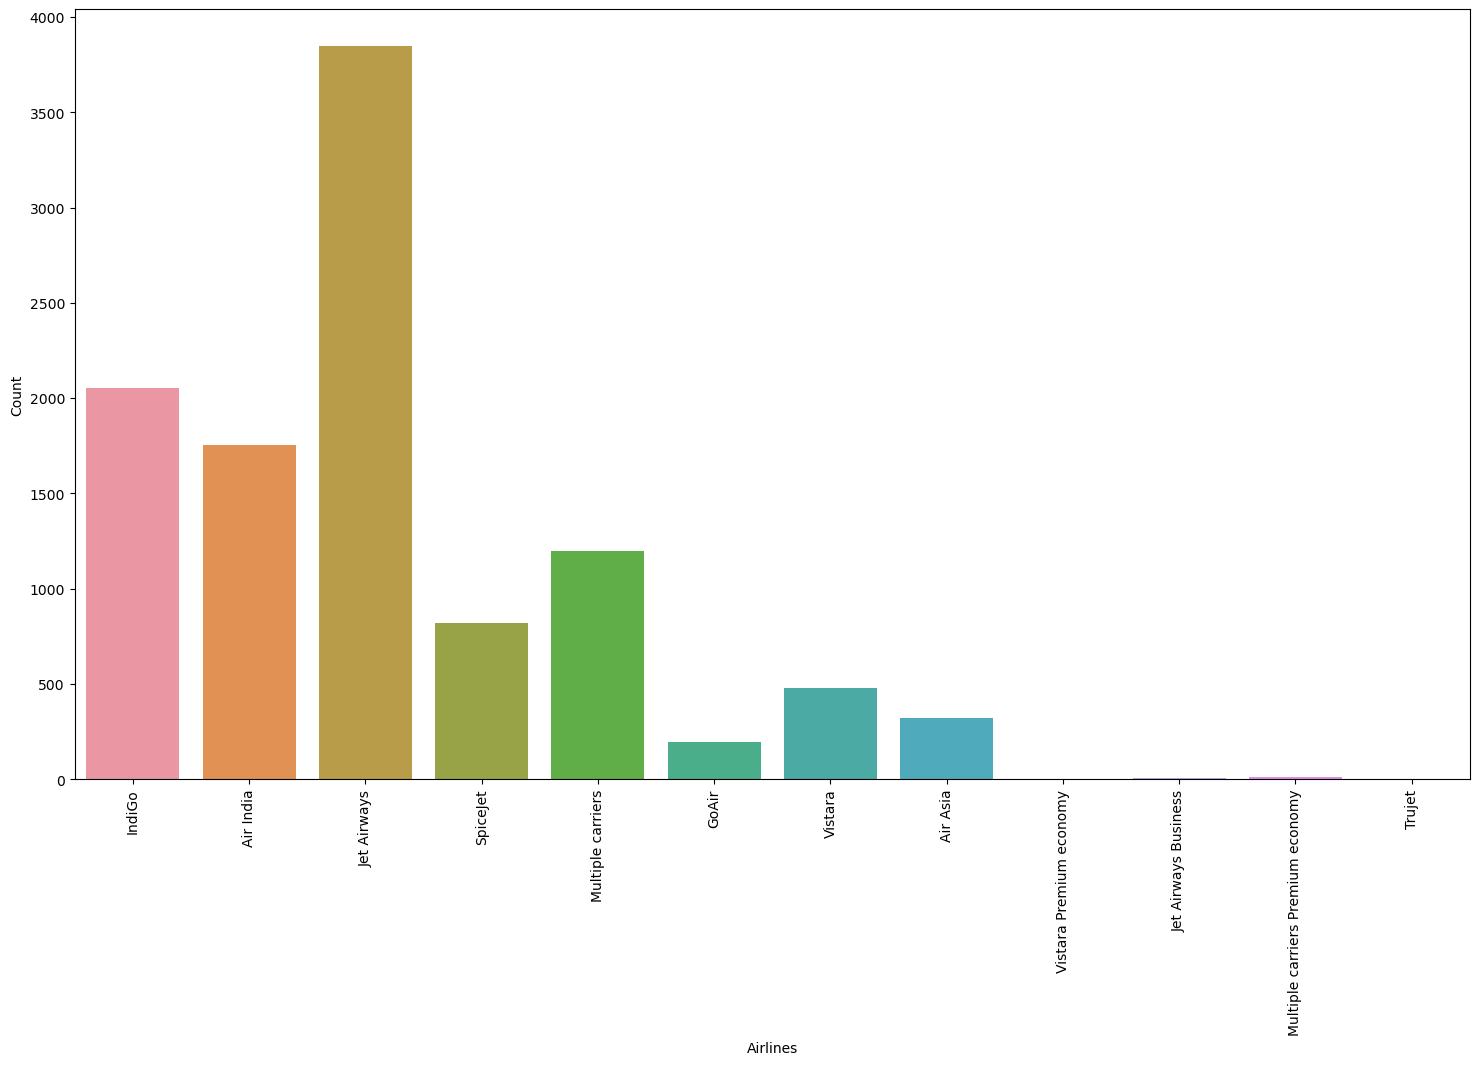

In [9]:
plt.figure(figsize=(18,10))
sns.countplot(x=train_df.Airline ,data=train_df)
#font_style={'family':'times new roman','size':20,'color':'black'}
plt.ylabel("Count")
plt.xlabel("Airlines")
plt.xticks(rotation= 90)

In [10]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Insights
- Most preferred Airline is "Jet Airways"
- Of all the total flight tickets sold, Jet Airways has the highest share followed by Indigo .

In [11]:
airlines = train_df.groupby('Airline')['Price'].max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


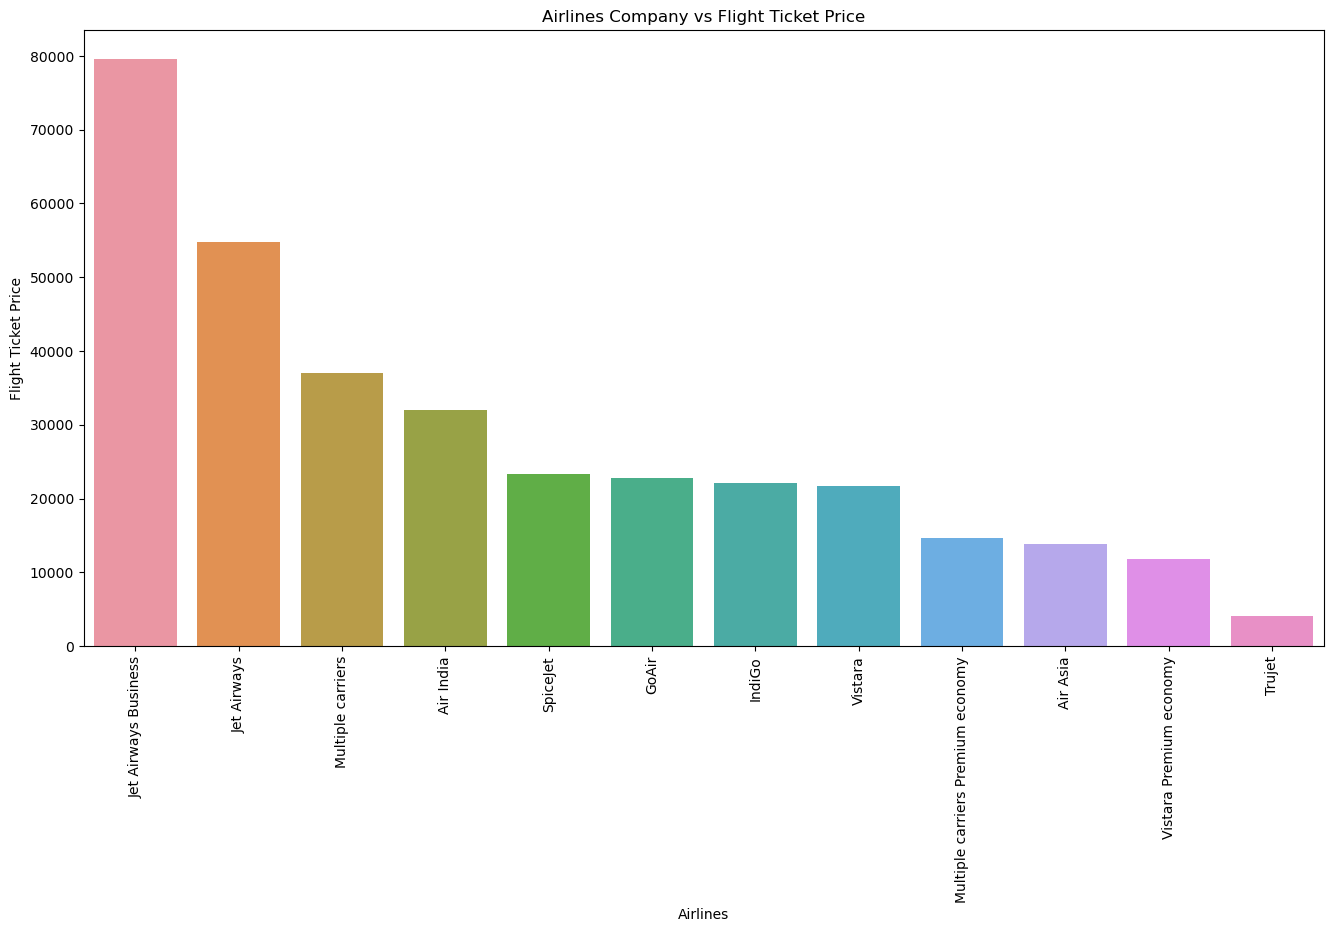

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"])
plt.title("Airlines Company vs Flight Ticket Price")
plt.ylabel("Flight Ticket Price")
plt.xlabel("Airlines")
plt.xticks(rotation=90)
plt.show()


<AxesSubplot: xlabel='Source', ylabel='count'>

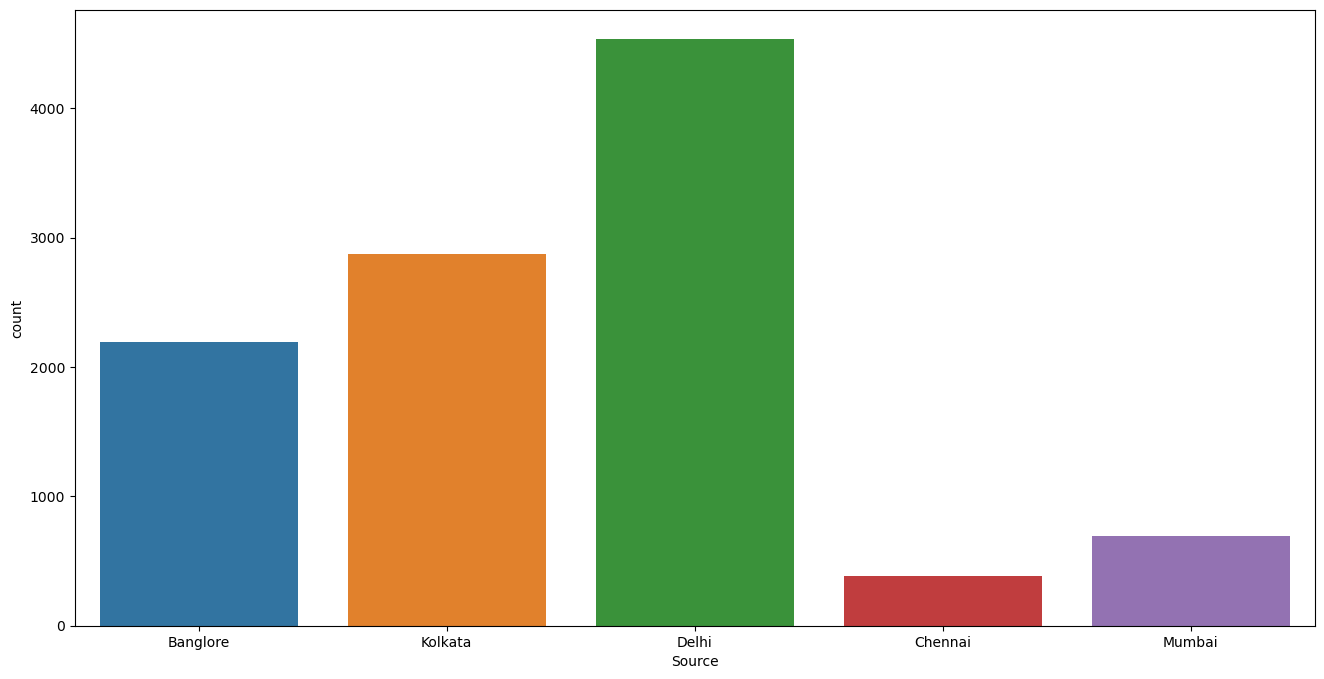

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['Source'],data=train_df)

<AxesSubplot: xlabel='Destination', ylabel='count'>

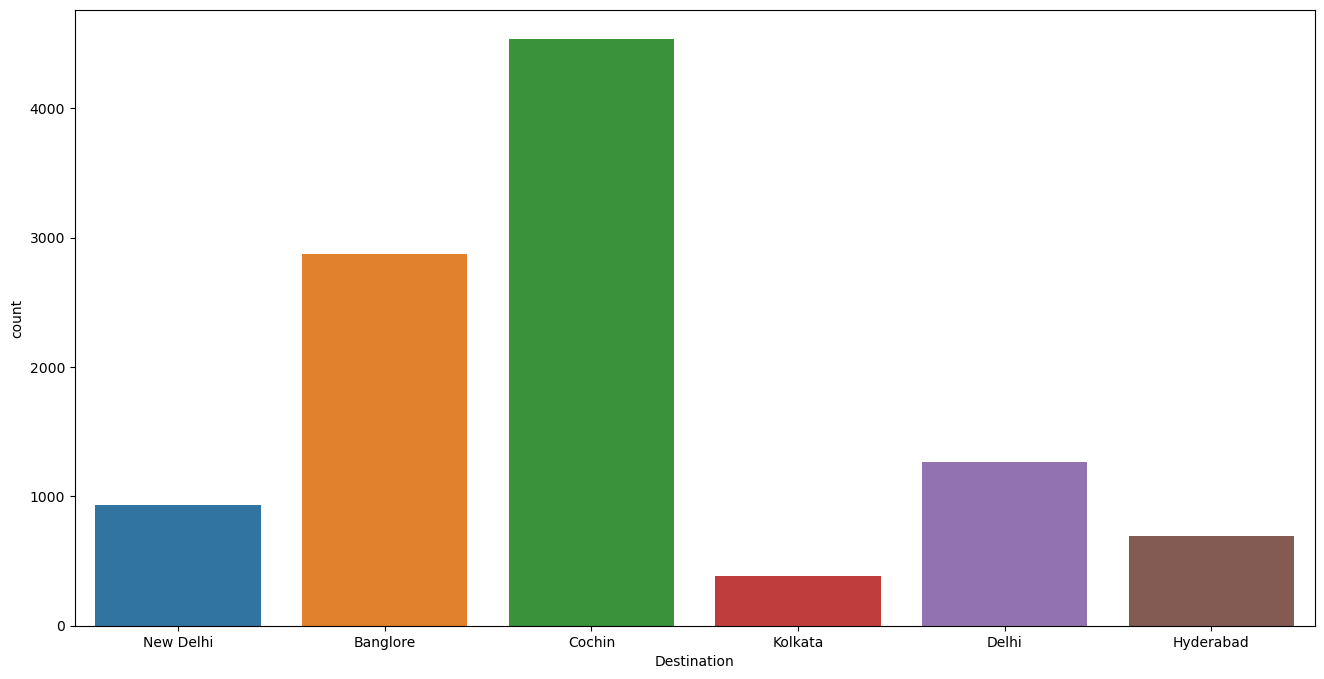

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['Destination'],data=train_df)

<AxesSubplot: xlabel='Total_Stops', ylabel='count'>

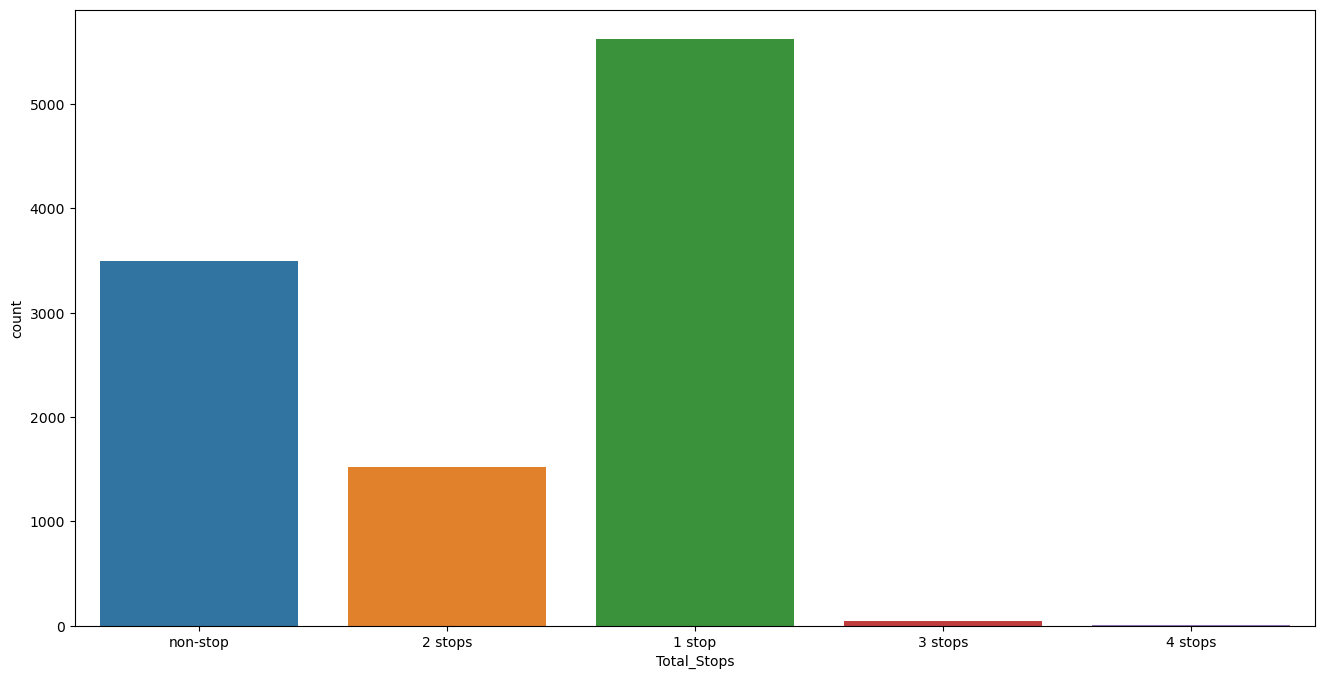

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x=train_df['Total_Stops'],data=train_df)

<AxesSubplot: >

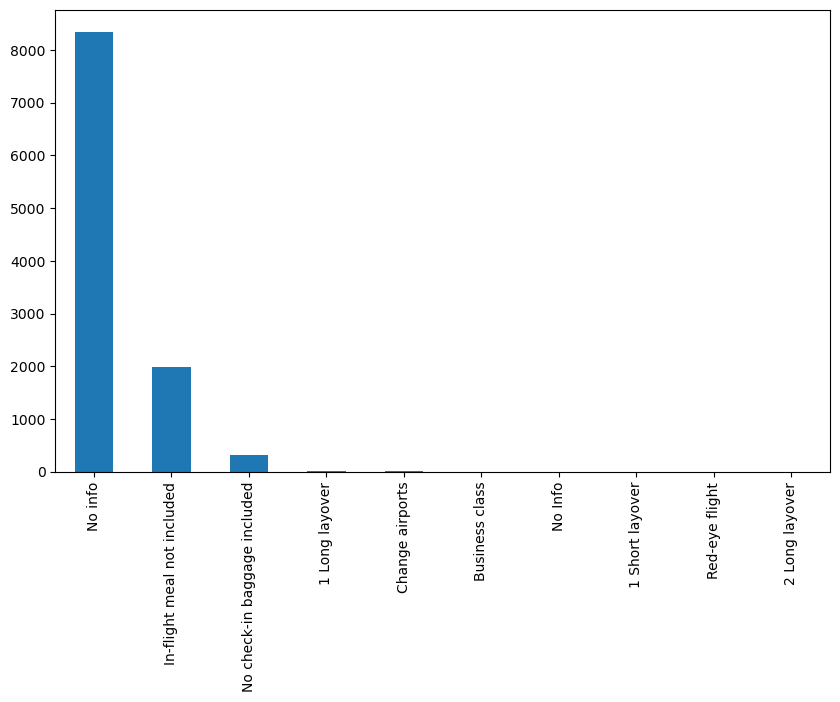

In [16]:
plt.figure(figsize=(10,6))
train_df['Additional_Info'].value_counts().plot(kind = 'bar') 

In [17]:
def feature_engineering(data:pd.DataFrame):
    data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
    data["Journey_month"]=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
    data.drop(["Date_of_Journey"], axis = 1, inplace = True)
    
    
    data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
    data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
    data.drop(["Dep_Time"], axis = 1, inplace = True)
    
    
    
    
    data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
    data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
    data.drop(["Arrival_Time"], axis = 1, inplace = True)
    
    
    data['Duration_hour'] = data['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[0].fillna(0).astype('int32')
    data['Duration_min'] = data['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[1].fillna(0).astype('int32')
    data['Duration'] = data['Duration_hour']*60 + data['Duration_min']
    data.drop(["Duration_hour","Duration_min"], axis = 1, inplace = True)
    
    
   
    
    
    
    return data
    
              

In [18]:
feature_engineering(train_df)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,11,30,14,10


In [19]:
train_df['Total_Stops']=train_df['Total_Stops'].replace({"1 stop":1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':3})
train_df = pd.get_dummies(train_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [20]:
train_df=train_df.drop(['Route','Additional_Info'],axis=1)

In [21]:
train_df

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,9,4,19,55,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10679,155,0,4145,27,4,20,45,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10680,180,0,7229,27,4,8,20,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,0,12648,1,3,11,30,14,10,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: >

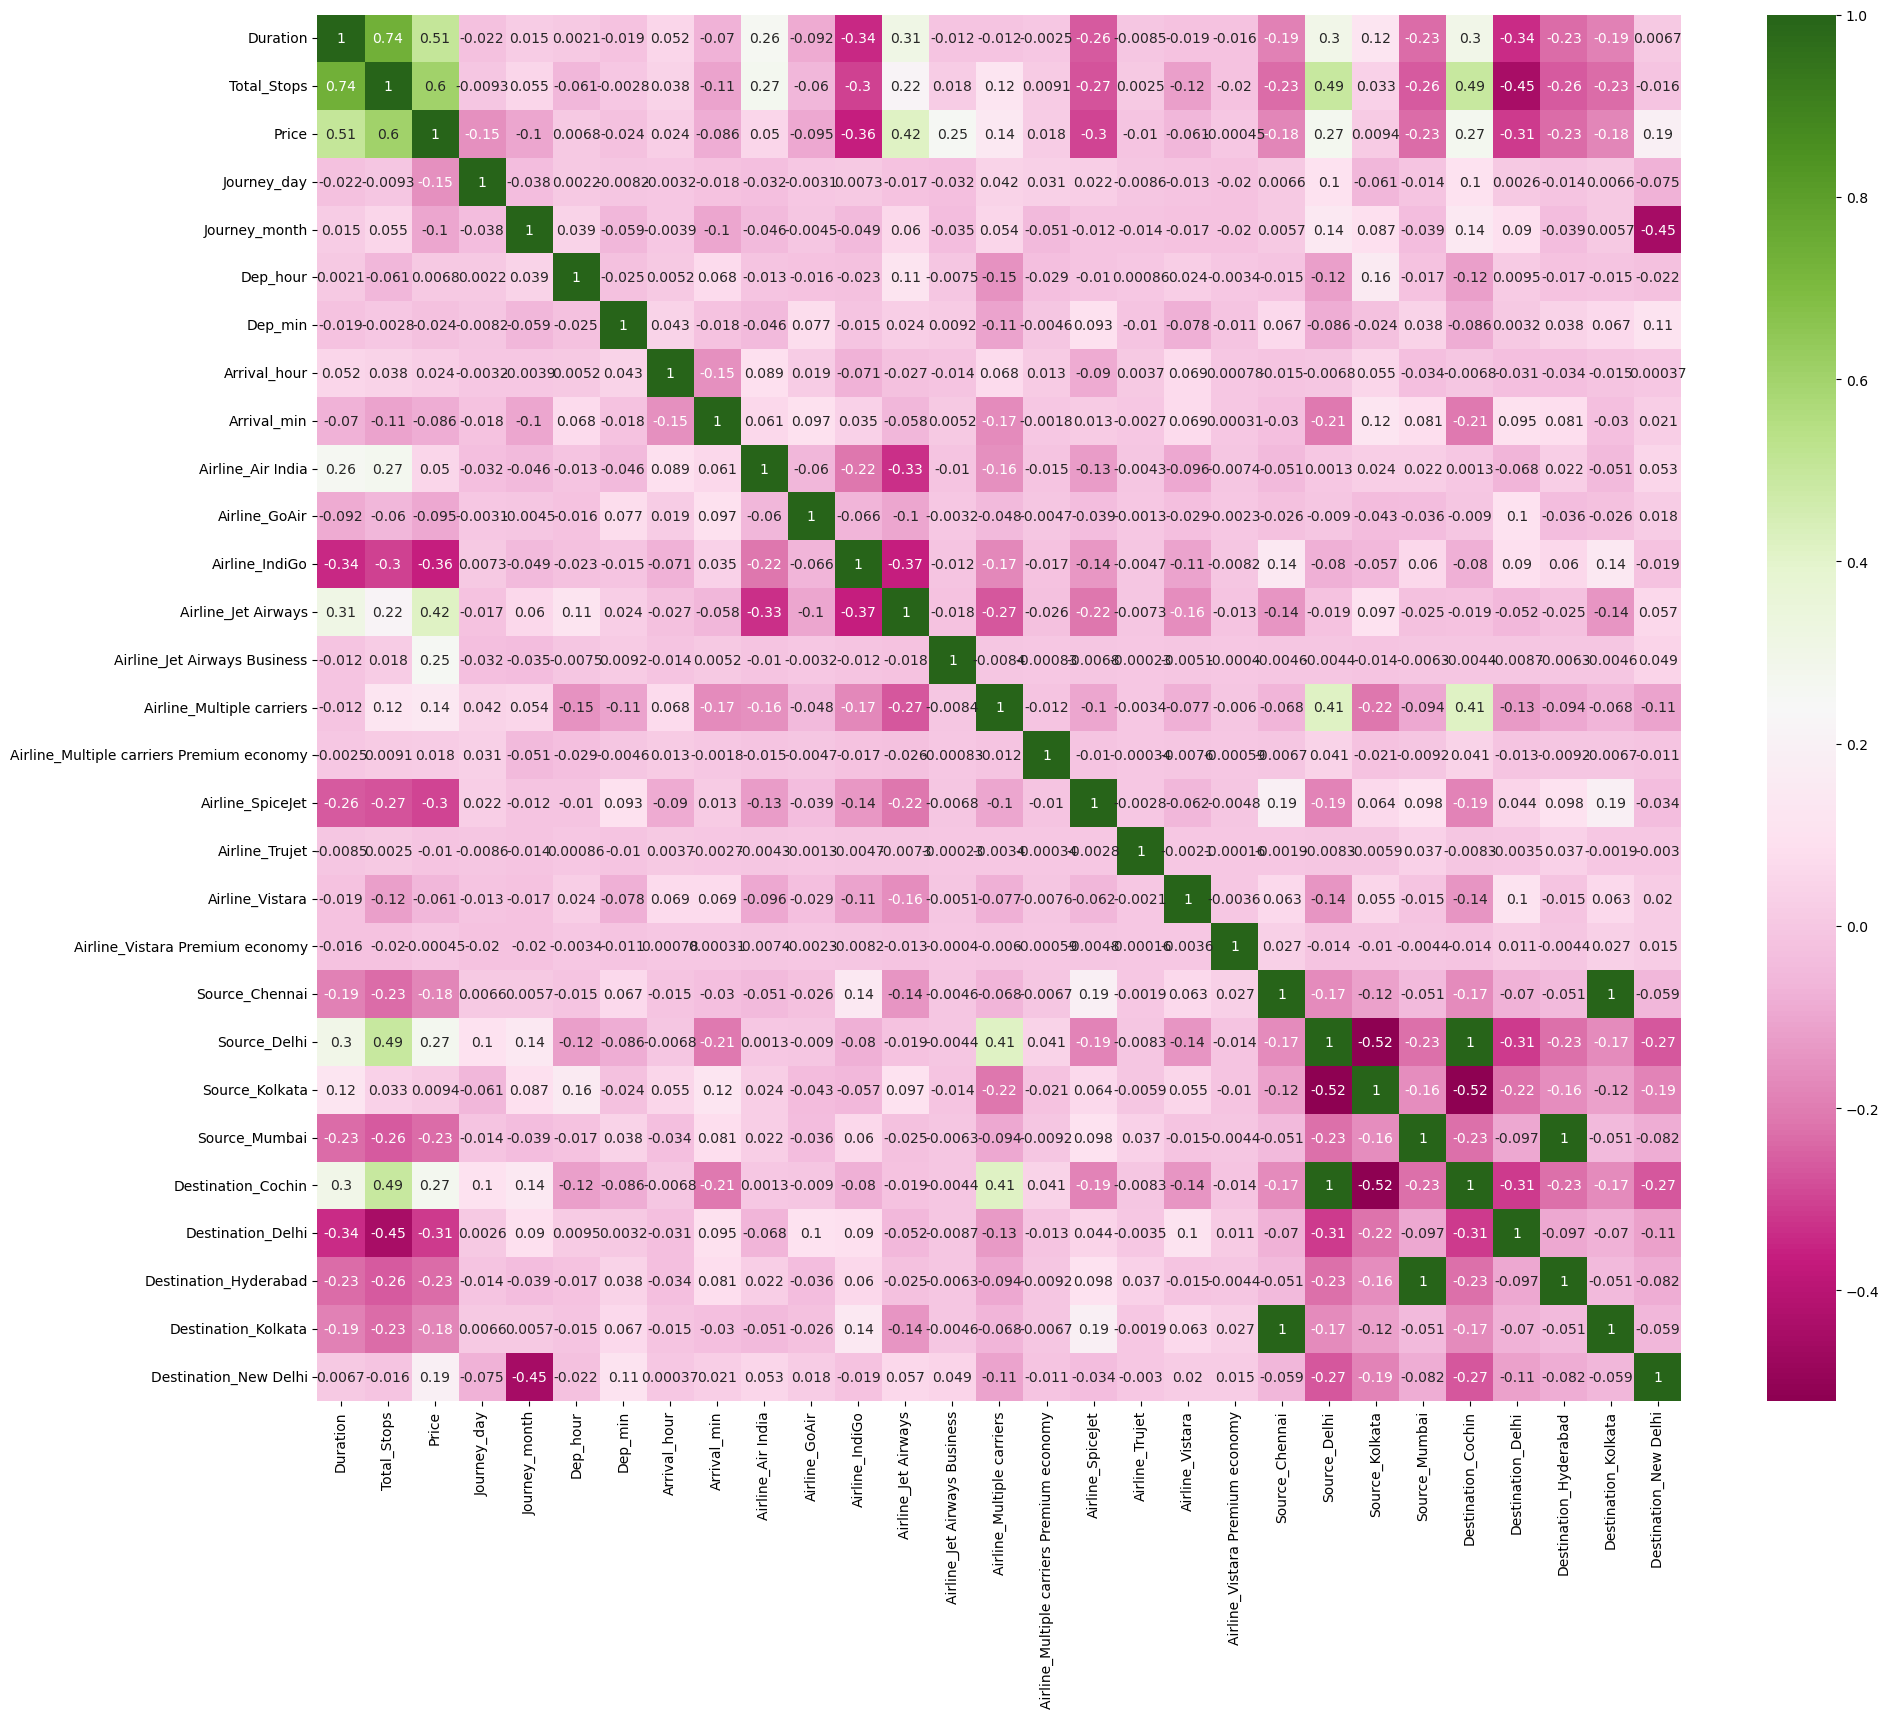

In [22]:
plt.figure(figsize = (22,18))
sns.heatmap(train_df.corr(), annot = True, cmap="PiYG")



<AxesSubplot: ylabel='Density'>

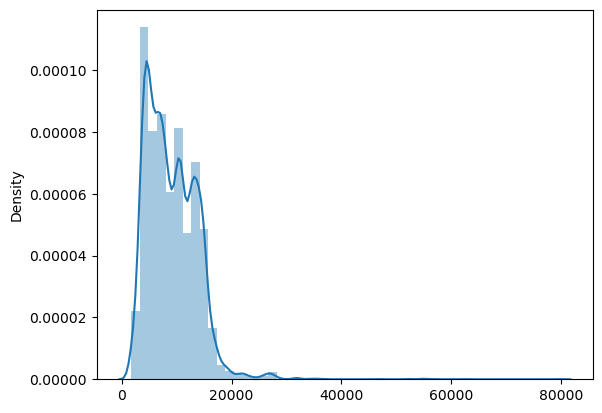

In [23]:
#sns.kdeplot(data=train_df, x="Price")
sns.distplot(x=train_df["Price"])

In [24]:
test_df = pd.read_excel("Test_set.xlsx")

In [25]:
test_df.shape

(2671, 10)

In [26]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [27]:
feature_engineering(test_df)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15


In [28]:
test_df['Total_Stops']=test_df['Total_Stops'].replace({"1 stop":1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':3})
test_df = pd.get_dummies(test_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [29]:
test_df.head()

,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,655,1,No info,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,240,1,No info,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1425,1,In-flight meal not included,21,5,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,780,1,No info,21,5,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,170,0,No info,24,6,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [30]:
test_df=test_df.drop(['Route','Additional_Info'],axis=1)

In [31]:
test_df.columns

Index(['Duration', 'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [32]:
train_df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [33]:
X=train_df[['Duration', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [34]:
y = np.log1p(train_df['Price'])

## Splitting the Data into Train & Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
X_train.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
749,90,0,27,6,10,20,11,50,0,0,...,0,0,0,0,1,0,0,1,0,0
6077,150,0,21,6,17,10,19,40,0,0,...,0,0,0,1,0,0,0,0,0,0
2373,630,1,27,5,15,0,1,30,0,0,...,0,0,1,0,0,1,0,0,0,0
2442,720,1,9,5,22,40,10,40,0,0,...,0,0,0,1,0,0,0,0,0,0
5402,1410,2,9,6,19,45,19,15,1,0,...,0,0,1,0,0,1,0,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[-1.08892213, -1.22565603,  1.57949139, ...,  3.86554404,
        -0.19540685, -0.31398962],
       [-0.9706924 , -1.22565603,  0.87097082, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       [-0.02485455,  0.25698919,  1.57949139, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       ...,
       [ 0.23130987,  0.25698919,  0.16245024, ..., -0.2586958 ,
        -0.19540685, -0.31398962],
       [-0.94113497, -1.22565603, -1.25459091, ..., -0.2586958 ,
        -0.19540685,  3.18481868],
       [ 0.55644164,  0.25698919, -1.49076444, ..., -0.2586958 ,
        -0.19540685, -0.31398962]])

## Model Building

In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingRegressor

In [42]:
model_list = [LinearRegression() , Ridge() , Lasso() , KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor() , GradientBoostingRegressor() , AdaBoostRegressor() ]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [43]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')

In [44]:
model_df

,Model,R2_score,MAPE,MAE,MSE
5,RandomForestRegressor,0.87,0.01,0.12,0.03
3,KNeighborsRegressor,0.85,0.02,0.14,0.04
6,GradientBoostingRegressor,0.84,0.02,0.16,0.04
4,DecisionTreeRegressor,0.80,0.02,0.14,0.05
0,LinearRegression,0.73,0.02,0.20,0.07
1,Ridge,0.73,0.02,0.20,0.07
7,AdaBoostRegressor,0.68,0.03,0.24,0.09
2,Lasso,-0.00,0.05,0.43,0.27


## Using Hyperparameter Tunning by RandomGridSearchCV

### Hyperparameter Tunning with RandomForest

In [46]:

random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [47]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [48]:
rf_regressor_best_parms=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth=15)

In [49]:
rf_regressor_best_parms.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      n_estimators=200)

In [50]:
pred=rf_regressor_best_parms.predict(X_test)

In [51]:
r2_score(y_test,pred)

0.8875266749289231

### Hyperparameter Tunning with XGB Regressor

In [52]:
xgb_params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [53]:
xgbr = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=xgb_params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [54]:
clf.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.4}

In [55]:
xgbr_With_best_parms = XGBRegressor(subsample= 0.6,
 n_estimators= 500,
 max_depth=6,
 learning_rate=0.01,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel=0.4)

In [56]:
xgbr_With_best_parms.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=1,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [57]:
xgbr_pred=xgbr_With_best_parms.predict(X_test)

In [58]:
r2_score(y_test,xgbr_pred)

0.83909934408567

## VotingRegressor

In [59]:
rf = RandomForestRegressor(n_estimators= 220,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth=15)

gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators= 500,learning_rate=0.01,max_depth=20)


model_vr = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])

model_vr.fit(X_train,y_train)

vr_pred = model_vr.predict(X_test)

print('R2 score',r2_score(y_test,vr_pred))
print('MAE',mean_absolute_error(y_test,vr_pred))

R2 score 0.8918016269770234
MAE 0.12006213319859181


## Exporting the Model

In [60]:
import pickle



In [61]:
pickle.dump(rf_regressor_best_parms,open('prediction_model.pkl','wb'))

In [ ]:
pickle.dump(rf_regressor_best_parms,open('prediction_model.pkl','wb'))